# Midterm 1:  Python Problems


There are three python problems.  Answer all the sections marked `#TODO`.  Print to PDF.  Submit the PDF only. 

## Loading Packages and Data

For the problems, you can use the following packages

In [231]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

Run the following code to download the data for the midterm.  This will retrieve three files -- one for each problem.

In [232]:
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
                
file_path = 'https://drive.google.com/file/d/10_1PxDIoSiuuOFC_iyVaoU9bDiQYHcTT/view?usp=sharing'
file_id = '10_1PxDIoSiuuOFC_iyVaoU9bDiQYHcTT'

dst = 'midterm_data.zip'
download_file_from_google_drive(file_id, dst)


# Unzip the files
import zipfile
with zipfile.ZipFile(dst, 'r') as zip_ref:
    zip_ref.extractall('data')
    
    
# Move them to the top directory
import shutil
for fn in ['prob_linear.p', 'prob_model.p', 'prob_logistic.p']:
    src = 'data/midterm1_data/%s' % fn
    shutil.move(src, fn)
    print('%s loaded' % fn)

prob_linear.p loaded
prob_model.p loaded
prob_logistic.p loaded


## Problem 1.  Linear Regression

### Data Generation
This is how the data was generated.

In [197]:
n = 500
d = 2
X = np.random.uniform(-1,1,(n,d))
z = 5*(X[:,0] + X[:,1])
y = 1/(1 + np.exp(-z))
#y = y + np.random.normal(0,0.1,n)

with open('prob_linear.p', 'wb') as fp:
    pickle.dump([X,y], fp)

Run the following code to load the data

In [213]:
with open('prob_linear.p', 'rb') as fp:
    X,y = pickle.load(fp)

Split the data into training and test.  You may use the `train_test_split` function.

In [214]:
# TODO
#    Xtr, Xts, ytr, yts = train_test_split(...)
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.5)

Suppose we want to fit a model of the form:

    yhat[i] = b + w[0]*X[i,0] + w[1]*X[i,1] + w[2]*X[i,0]*X[i,1] + w[3]*X[i,0]**2 + w[4]*X[i,1]**2
    
Complete the function `transform` below that creates a matrix `Z` whose columns are the basis functions for this model.  You may use the `np.column_stack()` function.  For example,

    Z = np.column_stack((col1, col2, col3))
    
creates a matrix `Z` with columns `col1`, `col2`, and `col3`.

In [215]:
def transform(X):
    # TODO
    #   Z = ...
    Z = np.column_stack((X[:,0], X[:,1], X[:,0]*X[:,1], X[:,0]**2, X[:,1]**2))
    return Z


Now fit and evaluate the model:

* Fit the model on the training data.  You may use the `LinearRegression` object and the `transform` function above.
* Predict the values `y` on the test data
* Print the test MSE 


In [216]:

# TODO

Ztr = transform(Xtr)
Zts = transform(Xts)

reg = LinearRegression()
reg.fit(Ztr, ytr)

yhat = reg.predict(Zts)
mse = np.mean((yhat-yts)**2)
print('Test MSE = %12.4e' % mse)

Test MSE =   2.3523e-02


## Problem 2.  Model Selection

Data generation

In [233]:
# Genreate inputs
n1 = 100
x0 = np.linspace(0,3,n1)
x1 = np.linspace(0,3,n1)
X = np.column_stack((x0, x1))

# Generate outputs for the data
sig = 0.2
y0 = 3 -   2*np.exp(-x0)
y1 = 3 - 1.5*np.exp(-x1)
y0 = y0 + np.random.normal(0,sig,n1) 
y1 = y1 + np.random.normal(0,sig,n1) 
Y = np.column_stack((y0, y1))

# Split each into training and test
ntr = int(0.5*n1)
nts = n1 - ntr
nexp = 2
Xtr = np.zeros((ntr,nexp))
Xts = np.zeros((ntr,nexp))
Ytr = np.zeros((ntr,nexp))
Yts = np.zeros((ntr,nexp))

for i in range(nexp):
    Xtr[:,i], Xts[:,i], Ytr[:,i], Yts[:,i] = train_test_split(X[:,i], Y[:,i],test_size=0.5)

with open('prob_model.p', 'wb') as fp:
    pickle.dump([Xtr, Xts, Ytr, Yts], fp)

You are given data from two experiments:

*  `Xtr[:,0], Ytr[:,0]` is the training data from experiment 0
*  `Xtr[:,1], Ytr[:,1]` is the training data from experiment 1
*  `Xts[:,0], Yts[:,0]` is the test data from experiment 0
*  `Xts[:,1], Yts[:,1]` is the test data from experiment 1

The code below loads and plots the data for each experiment.

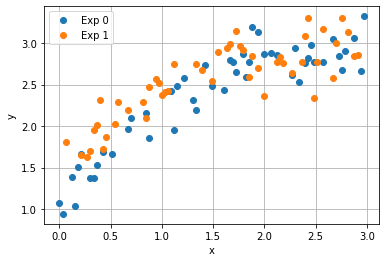

In [234]:
with open('prob_model.p', 'rb') as fp:
    Xtr, Xts, Ytr, Yts = pickle.load(fp)
    

plt.plot(Xtr[:,0], Ytr[:,0], 'o')
plt.plot(Xtr[:,1], Ytr[:,1], 'o')
plt.legend(['Exp 0', 'Exp 1'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

You want to learn the relation between `y` vs. `x`. 

First, fit two *separate* models for each experiment of the form:
    
     Y[:,0] ~= a0 + b0*exp(-X[:,0])
     Y[:,1] ~= a1 + b1*exp(-X[:,1])
    
 
For the data in each experiment, fit the model and pint the test MSE.

You may use the `LinearRegression` function for the fitting. But, if `z` is a vector (not a matrix), you cannot use:

     reg = LinearRegression()
     reg.fit(z, y)   # WILL NOT WORK if z is a vector.
     
You must reshape `z` to a `n x 1` matrix first:

     reg = LinearRegression()
     reg.fit(z[:,None], y)   # This will work


In [235]:
nexp = Xtr.shape[1]
mse = np.zeros(nexp)
for i in range(nexp):
    
    # Transform the data
    ztr = np.exp(-Xtr[:,i])[:,None]
    zts = np.exp(-Xts[:,i])[:,None]
    
    # Fit the model on the training data
    reg = LinearRegression()
    reg.fit(ztr, Ytr[:,i])
    
    # Measure the MSE
    yhat = reg.predict(zts)
    mse[i] = np.mean((yhat-Yts[:,i])**2)
    
    print('Test MSE Exp %d = %12.4e' % (i, mse[i]))
    
print('Avg test MSE   = %12.4e' % np.mean(mse))


Test MSE Exp 0 =   2.7241e-02
Test MSE Exp 1 =   4.5369e-02
Avg test MSE   =   3.6305e-02


Now, fit a model of the form:

     Y[:,0] = a + b0*exp(-X[:,0])
     Y[:,1] = a + b1*exp(-X[:,1])
     
So, the two experiments have the same  intercept term.  Fit the model on the training data and measure the test MSE.

For training, you will want to combine the data into a single feature matrix `Z` using `Xtr[:,0]` and `Xts[:,1]` and single target vector `b` from `Ytr[:,0]` and `Ytr[:,1]`.  


In [236]:
# TODO 

def transform(X,Y):

    n = X.shape[0]
    Z1 = np.column_stack((np.exp(-X[:,0]), np.zeros(n)))
    Z2 = np.column_stack((np.zeros(n), np.exp(-X[:,1])))
    Z = np.vstack((Z1, Z2))
    
    b = np.hstack((Y[:,0], Y[:,1]))
    return Z, b

Ztr, btr = transform(Xtr, Ytr)
Zts, bts = transform(Xts, Yts)

# Fit the model on the training data
reg = LinearRegression()
reg.fit(Ztr, btr)

# Measure the MSE
bhat = reg.predict(Zts)
mse = np.mean((bhat-bts)**2)

print('MSE = %12.4e' % mse)



MSE =   3.6298e-02


## Problem 3.  Logistic Regression

Data generation

In [195]:
n0 = 200
n1 = 200
d = 2
y = np.random.randint(0,2,n)

# Samples for y=0
X0 = np.random.normal(0,0.3,(n0,d))

# Sample for y=1
theta = np.random.uniform(-0.8*np.pi/2,0.8*np.pi/2,n1)
X1 = np.column_stack((np.cos(theta), np.sin(theta)))
X1 = X1 + np.random.normal(0,0.2,(n1,d))

X = np.vstack((X0, X1))
y = np.hstack((np.zeros(n0), np.ones(n1)))

n = n0 + n1
I = np.random.permutation(n)
X = X[I]
y = y[I]

with open('prob_logistic.p', 'wb') as fp:
    pickle.dump([X, y], fp)

Run the following code to load the data as follows:

In [221]:
with open('prob_logistic.p', 'rb') as fp:
    X,y = pickle.load(fp)

Plot a scatter plot of the data with different colors for the two classes.  You may use the `plt.scatter` function.

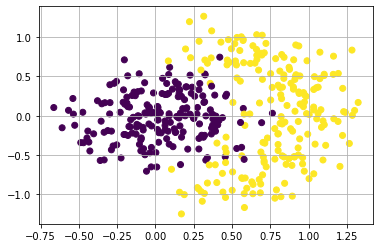

In [222]:
# TODO
plt.scatter(X[:,0], X[:,1], c=y)
plt.grid()

Split the data into training and test.  You may use the `train_test_split` method.  Use `test_size=0.5`.

In [223]:
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.5)

Consider a classifier of the form:

    yhat[i] = 1 when z[i] > t
    yhat[i] = 0 when z[i] <= t
         
where `z[i] = X[i,0] + np.abs(X[i,1])`.
         
For each value `t` in `ttest`, compute the accuracy of the classifier on the *training* data. 
Plot the training accuracy as a function of `t`.

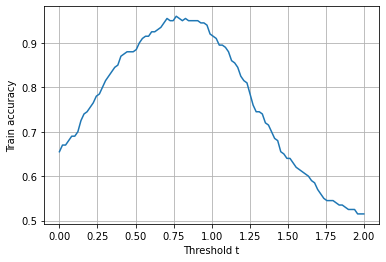

In [194]:
ttest = np.linspace(0,2,100)

# TODO
acc = []
for t in ttest:
    yhat = (Xtr[:,0] + np.abs(Xtr[:,1]) > t)
    acci = np.mean(yhat == ytr)
    acc.append(acci)
acc = np.array(acc)

plt.plot(ttest, acc)
plt.xlabel('Threshold t')
plt.ylabel('Train accuracy')
plt.grid()

Find the value of `t` with the highest training accuracy.  Print the test accuracy for the classifier with that value of `t`.

In [192]:
# TODO: 
#    topt = ...
im = np.argmax(acc)
topt = ttest[im]

# TODO.
#    acc_ts = ...
yhat = (Xts[:,0] +  np.abs(Xts[:,1]) > topt)
acc_ts = np.mean(yhat == yts)
print(acc_ts)


0.965
